prototyping data analysis with pandas

In [77]:
from pylab import *
import json
ar=json.load(open('/Users/ia/workspace/serval/notebooks/temps.json','r'))

In [78]:
#[k for k in ar.keys() if ar[k]['data'] is not None]
#ar['P07.Temp']

good_keys = []

for k in ar.keys():
    #print(k)
    if ar[k].__class__ is not dict: continue
    if 'data' not in ar[k].keys(): continue
    if ar[k]['data'] is not None:
        good_keys.append(k)

print(len(good_keys)) 
print(len(ar.keys()))

988
989


In [104]:
print(good_keys)

['Reserved#842', 'SL_96S_Cu', 'SWR_79DKs', 'SL_82S_Cu', 'WR_148QA', 'Reserved#744', 'OL_111PQK', 'NWL_96S_Al', 'SL_27QA1G', 'SOR_96S_Al', 'NWL_82_SAI', 'NOL_68QA', 'Reserved#750', 'Reserved#865', 'Reserved#966', 'NOL_53PQG', 'WR_75PQG', 'WL_68QA', 'SOR_133QA', 'Reserved#748', 'NWR_68S_Al', 'SOR_132S_Cu', 'NOL_50D', 'WR_83QA', 'Reserved#919', 'SOL_86DKs', 'SWL_64D', 'Reserved#977', 'OL_13QA', 'SOR_68S_Al', 'NOL_27DKs', 'SOL_83QA', 'NWR_97QA', 'NL_108DKs', 'Reserved#984', 'OL_48PQK', 'NOR_118PQK', 'SWL_97QA', 'NOL_118S_CuK', 'Reserved#754', 'Reserved#786', 'Reserved#915', 'Reserved#868', 'WR_125S_Cu', 'OL_91PQK', 'Reserved#823', 'SR_6QA1', 'Reserved#947', 'Reserved#930', 'NWR_72D', 'NL_53QA1', 'SL_125S_CuK', 'Reserved#913', 'NL_118S_Al', 'SR_151D', 'NWR_27DKs', 'SWL_119QA', 'SL_37QA', 'NWR_132S_CuK', 'NOR_82PQK', 'Reserved#971', 'SOL_111S_Al', 'NL_126QA', 'Reserved#808', 'NOL_72DKs', 'SOR_75S_CuK', 'Reserved#886', 'OL_61PQK', 'SL_30QA', 'Reserved#927', 'SOL_24QA1', 'OL_134PQK', 'NOL_82S_

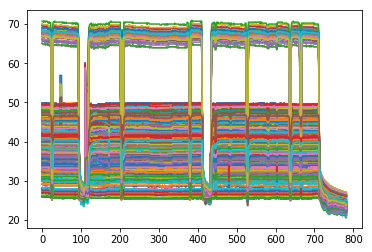

In [133]:
keys = []
for k in good_keys[:]:
    a = [ t[0] for t in ar[k]['data']]
    if np.max(np.abs(a)) < 200 and np.max(np.abs(a)) > 0.5 and np.min(a) > 0.0: 
        plt.plot(a[:])
        keys.append(k)
ax = plt.gca()
#ax.set_ylim([23,26])


In [121]:
print(len(keys))

730


In [116]:
import pandas as pd

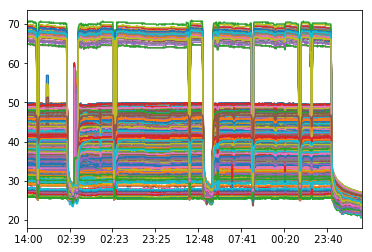

In [156]:
import time

df = pd.DataFrame()
for k in keys[:]:
    r = ar[k]['data']
    try:
        r = r[:]
        d2 = pd.Series([ t[0] for t in r], index=[ time.ctime(t[1])[10:16] for t in r])
        d2.plot()
        df[k] = d2
    except:
        pass

In [141]:
df

,SL_96S_Cu,SWR_79DKs,SL_82S_Cu,WR_148QA,OL_111PQK,NWL_96S_Al,SL_27QA1G,SOR_96S_Al,NWL_82_SAI,NOL_68QA,...,SWR_100D,WL_76QA,NOR_80PQL,WL_25QA,NWR_82S_Al,NWL_119QA,NOL_96S_Al,SL_104S_Al,SWL_125S_Al,NL_49DKs
Fri Sep 21 14:00:15 2018,68.463737,34.896961,67.656929,49.585896,33.295727,38.790310,33.295727,38.067860,38.354973,42.404900,...,35.660831,45.782059,30.611740,42.112930,34.939079,46.747585,37.255623,39.272022,39.512917,40.668480
Fri Sep 21 19:00:06 2018,68.463737,34.896961,67.656929,49.585896,33.295727,38.790310,33.055008,38.067860,38.113884,42.163795,...,35.660831,45.782059,30.611740,41.872143,34.939079,46.747585,37.255623,39.272022,39.512917,40.668480
Sat Sep 22 00:00:09 2018,68.221024,34.656696,67.413704,49.585896,33.295727,38.549469,33.055008,38.067860,38.113884,42.163795,...,35.660831,45.540710,30.371508,41.872143,34.939079,46.747585,37.255623,39.272022,39.512917,40.668480
Sat Sep 22 05:00:05 2018,68.221024,34.656696,67.413704,49.585896,33.295727,38.790310,33.055008,38.067860,38.354973,42.163795,...,35.420235,45.782059,30.371508,41.872143,34.939079,46.747585,37.255623,39.272022,39.512917,40.668480
Sat Sep 22 10:00:12 2018,68.221024,34.656696,67.413704,49.585896,33.295727,38.790310,33.055008,38.067860,38.113884,42.163795,...,35.660831,45.782059,30.611740,41.872143,34.939079,46.747585,37.255623,39.272022,39.512917,40.668480
Sat Sep 22 15:00:20 2018,68.221024,34.656696,67.413704,49.585896,33.295727,38.790310,33.055008,38.067860,38.354973,42.163795,...,35.660831,45.782059,30.611740,41.872143,34.939079,46.747585,37.255623,39.272022,39.512917,40.668480
Sat Sep 22 20:00:26 2018,68.221024,34.656696,67.413704,49.585896,33.295727,38.790310,33.055008,38.067860,38.354973,42.163795,...,35.660831,45.782059,30.611740,41.872143,34.939079,46.747585,37.255623,39.272022,39.512917,40.668480
Sun Sep 23 01:00:28 2018,68.221024,34.656696,67.413704,49.585896,33.295727,38.790310,33.055008,38.067860,38.354973,42.163795,...,35.660831,45.782059,30.371508,41.872143,34.939079,46.747585,37.255623,39.272022,39.512917,40.668480
Sun Sep 23 06:00:29 2018,68.221024,34.656696,67.656929,49.585896,33.295727,38.790310,33.055008,38.067860,38.354973,42.163795,...,35.660831,45.782059,30.611740,41.872143,34.939079,46.747585,37.255623,39.272022,39.512917,40.668480
Sun Sep 23 11:00:30 2018,68.221024,34.656696,67.413704,49.585896,33.295727,38.790310,33.055008,38.067860,38.354973,42.163795,...,35.660831,45.782059,30.611740,41.872143,34.939079,46.747585,37.255623,39.272022,39.512917,40.668480


In [136]:
df.corr()

,SL_96S_Cu,SWR_79DKs,SL_82S_Cu,WR_148QA,OL_111PQK,NWL_96S_Al,SL_27QA1G,SOR_96S_Al,NWL_82_SAI,NOL_68QA,...,SWR_100D,WL_76QA,NOR_80PQL,WL_25QA,NWR_82S_Al,NWL_119QA,NOL_96S_Al,SL_104S_Al,SWL_125S_Al,NL_49DKs
SL_96S_Cu,1.000000,0.936814,0.999148,0.971070,0.949232,0.971009,0.898685,0.964977,0.970872,0.969188,...,0.938371,0.972468,0.818524,0.965355,0.940498,0.971267,0.969948,0.971433,0.973210,0.934990
SWR_79DKs,0.936814,1.000000,0.935895,0.979459,0.939520,0.984902,0.976975,0.982884,0.985918,0.983069,...,0.999301,0.980692,0.822411,0.980900,0.983193,0.981852,0.982096,0.982313,0.983554,0.992511
SL_82S_Cu,0.999148,0.935895,1.000000,0.969976,0.947922,0.969886,0.897791,0.963929,0.969759,0.968123,...,0.937371,0.971358,0.817273,0.964273,0.939751,0.970167,0.968764,0.970320,0.971986,0.934095
WR_148QA,0.971070,0.979459,0.969976,1.000000,0.964429,0.991290,0.950514,0.988587,0.991771,0.998414,...,0.981211,0.999537,0.838279,0.994806,0.982089,0.999677,0.988806,0.990651,0.990562,0.980350
OL_111PQK,0.949232,0.939520,0.947922,0.964429,1.000000,0.963554,0.926242,0.961775,0.964036,0.967247,...,0.942013,0.965322,0.947665,0.966432,0.951419,0.964937,0.965544,0.964910,0.964000,0.937748
NWL_96S_Al,0.971009,0.984902,0.969886,0.991290,0.963554,1.000000,0.971284,0.998293,0.999688,0.995466,...,0.986845,0.993072,0.849331,0.990751,0.990885,0.993201,0.998650,0.998794,0.998863,0.987519
SL_27QA1G,0.898685,0.976975,0.897791,0.950514,0.926242,0.971284,1.000000,0.978122,0.971354,0.962243,...,0.978667,0.954209,0.840769,0.963250,0.986507,0.954501,0.973591,0.972305,0.970977,0.986323
SOR_96S_Al,0.964977,0.982884,0.963929,0.988587,0.961775,0.998293,0.978122,1.000000,0.998139,0.993752,...,0.985096,0.990619,0.851627,0.991417,0.993543,0.990491,0.998700,0.999006,0.998486,0.989775
NWL_82_SAI,0.970872,0.985918,0.969759,0.991771,0.964036,0.999688,0.971354,0.998139,1.000000,0.995835,...,0.987780,0.993496,0.849582,0.991481,0.990698,0.993727,0.998609,0.998792,0.998959,0.987809
NOL_68QA,0.969188,0.983069,0.968123,0.998414,0.967247,0.995466,0.962243,0.993752,0.995835,1.000000,...,0.985266,0.998965,0.847672,0.995436,0.988818,0.999043,0.994119,0.994934,0.994623,0.984955


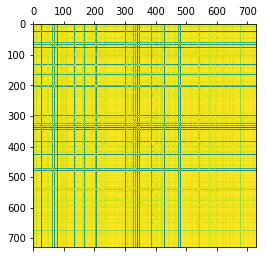

In [144]:
plt.matshow(df.corr())

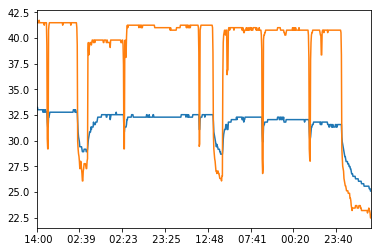

In [157]:
df['NOL_39PQG'].plot()
df['WR_31QA'].plot()

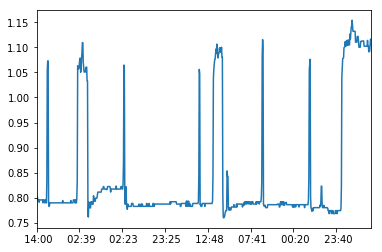

In [158]:
( df['NOL_39PQG'] / df['WR_31QA']).plot()

In [ ]:
#next step correlation with current